In [1]:
import pandas as pd
import numpy as np

### data from...
### https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data

In [2]:
# Data Load
filepath = 'C:/Users/user/Desktop/DailyDelhiClimateTrain.csv'
filepath_test = 'C:/Users/user/Desktop/DailyDelhiClimateTest.csv'

df = pd.read_csv(filepath, parse_dates=True, index_col='date')
df_test = pd.read_csv(filepath_test, parse_dates=True, index_col='date')

df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


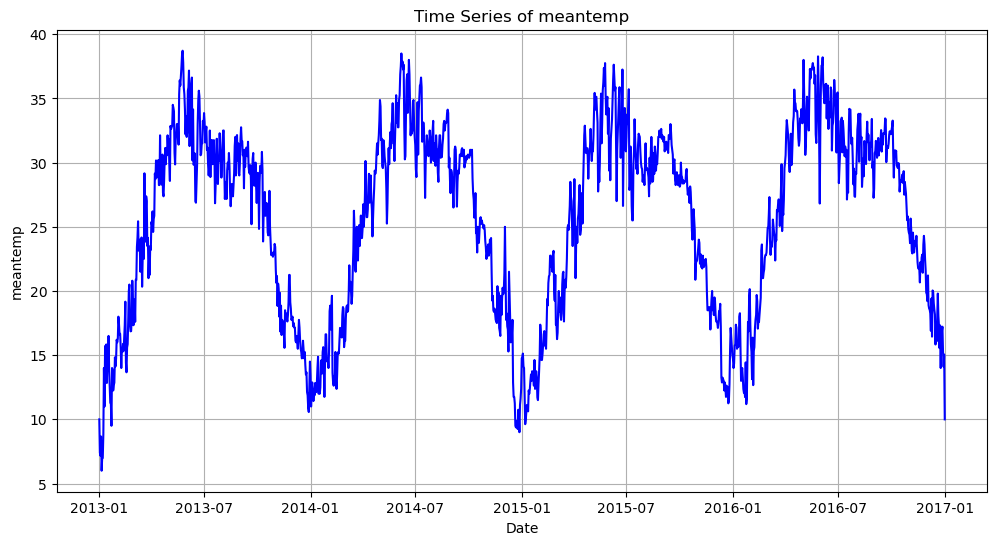

In [79]:

# Extract 'humidity' values
temp_values = df['meantemp']

# Plotting the time series data
plt.figure(figsize=(12, 6))  # Optional: Set the size of the figure
plt.plot(df.index, temp_values, color='b')
plt.xlabel('Date')
plt.ylabel('meantemp')
plt.title('Time Series of meantemp')
plt.grid(True)
plt.show()

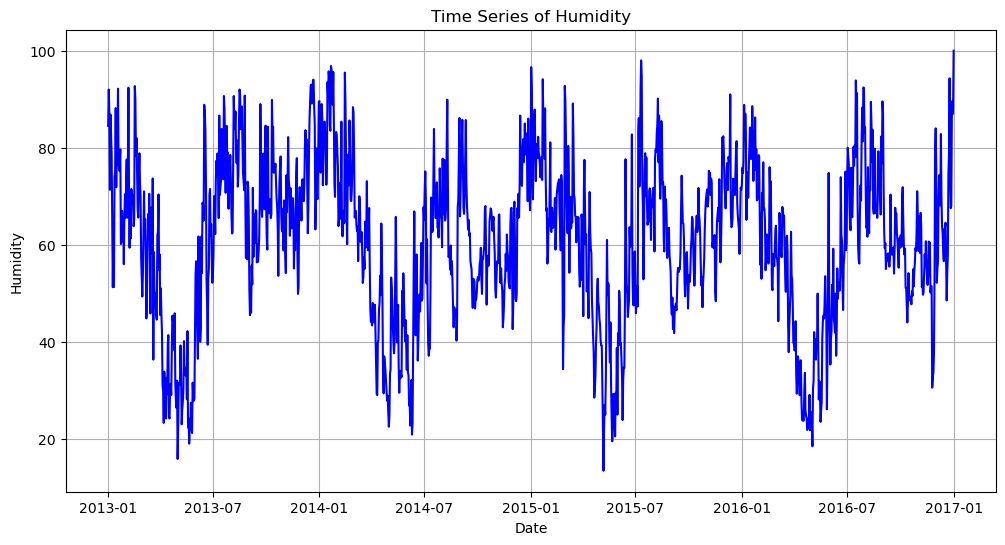

In [3]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the given data
# Make sure 'date' is a datetime index (you can convert it to datetime if it's not already)
df.index = pd.to_datetime(df.index)

# Extract 'humidity' values
humidity_values = df['humidity']

# Plotting the time series data
plt.figure(figsize=(12, 6))  # Optional: Set the size of the figure
plt.plot(df.index, humidity_values, color='b')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Time Series of Humidity')
plt.grid(True)
plt.show()

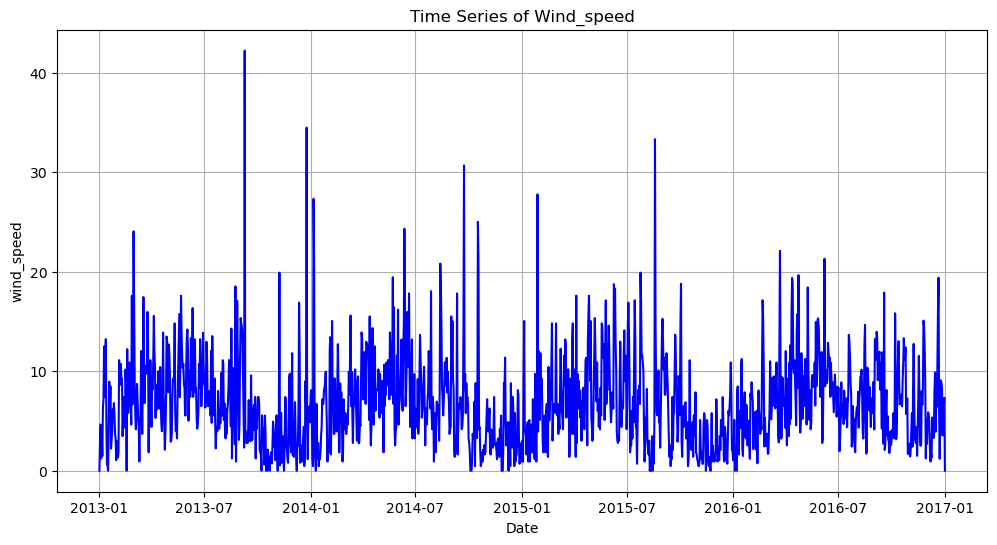

In [5]:

# Extract 'humidity' values
wind_values = df['wind_speed']

# Plotting the time series data
plt.figure(figsize=(12, 6))  # Optional: Set the size of the figure
plt.plot(df.index, wind_values, color='b')
plt.xlabel('Date')
plt.ylabel('wind_speed')
plt.title('Time Series of Wind_speed')
plt.grid(True)
plt.show()

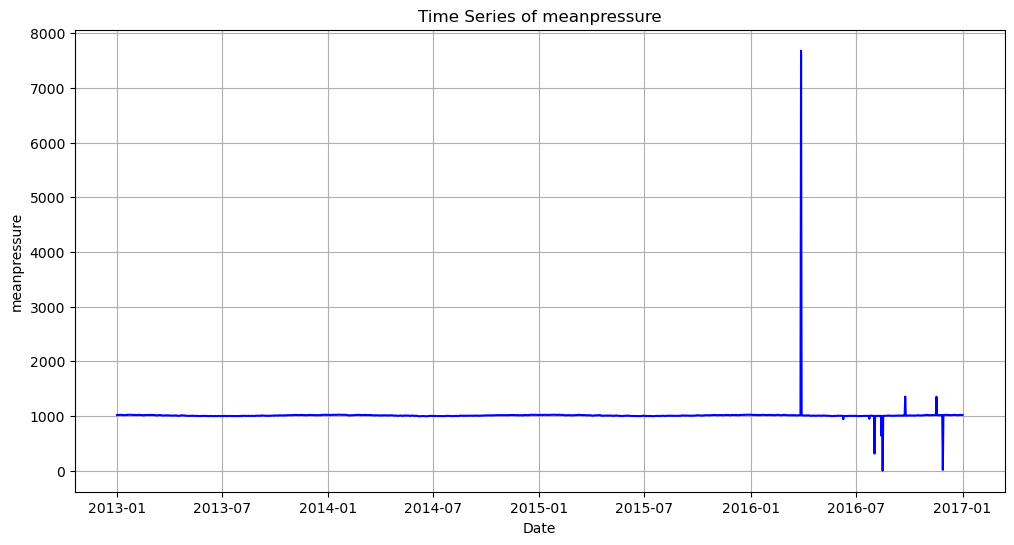

In [8]:
pres_values = df['meanpressure']


plt.figure(figsize=(12, 6))  # Optional: Set the size of the figure
plt.plot(df.index, pres_values, color='b')
plt.xlabel('Date')
plt.ylabel('meanpressure')
plt.title('Time Series of meanpressure')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Recurrence Plot (Mean Pressure)')

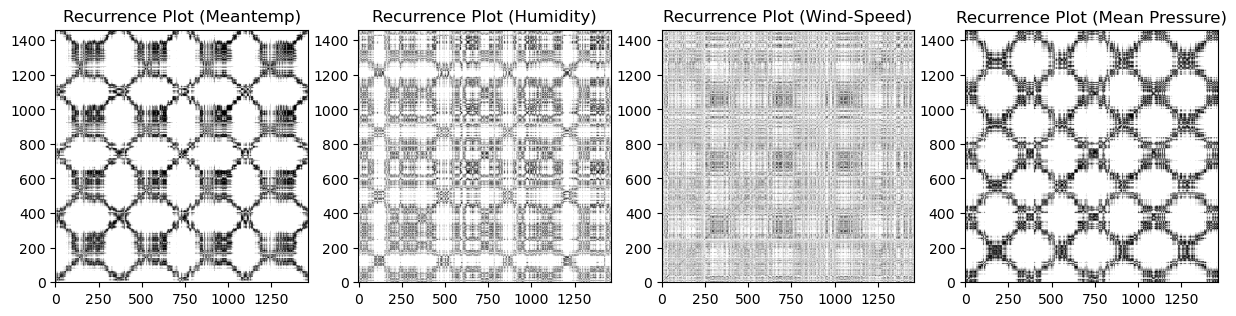

In [17]:
# 'meantemp' recurrence plot

close_temp = df['meantemp'].values
close_humid = df['humidity'].values
close_wind = df['wind_speed'].values
close_press = df['meanpressure'].values

transformer_tem = RecurrencePlot(threshold='point', percentage=20)
rp_temp = transformer_tem.fit_transform(close_temp.reshape(1, -1))

transformer_hum = RecurrencePlot(threshold='point', percentage=20)
rp_humid = transformer_hum.fit_transform(close_humid.reshape(1, -1))

transformer_win = RecurrencePlot(threshold='point', percentage=20)
rp_wind = transformer_win.fit_transform(close_wind.reshape(1, -1))

transformer_pre = RecurrencePlot(threshold='point', percentage=20)
rp_press = transformer_pre.fit_transform(close_press.reshape(1, -1))

# 이미지 출력
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(rp_temp[0], cmap='binary', origin='lower')
axes[0].set_title('Recurrence Plot (Meantemp)')

axes[1].imshow(rp_humid[0], cmap='binary', origin='lower')
axes[1].set_title('Recurrence Plot (Humidity)')

axes[2].imshow(rp_wind[0], cmap='binary', origin='lower')
axes[2].set_title('Recurrence Plot (Wind-Speed)')

axes[3].imshow(rp_press[0], cmap='binary', origin='lower')
axes[3].set_title('Recurrence Plot (Mean Pressure)')

# After Scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## (1) MinMax

In [54]:
# MinMaxScaler 객체 생성
scaler_mm = MinMaxScaler()

# 선택한 컬럼들에 대해 Min-Max 스케일링 수행
scaled_values = scaler_mm.fit_transform(df[['meantemp','humidity', 'wind_speed', 'meanpressure']])
df_mm = df.copy()  # 기존의 df를 복사하여 df_scaled 생성
df_mm[['meantemp','humidity', 'wind_speed', 'meanpressure']] = scaled_values

# 스케일링된 데이터 확인
df_mm

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,0.122271,0.820957,0.000000,0.132603
2013-01-02,0.042795,0.907591,0.070583,0.132881
2013-01-03,0.035662,0.849835,0.109743,0.132994
2013-01-04,0.081514,0.668867,0.029212,0.132799
2013-01-05,0.000000,0.847910,0.087636,0.132712
...,...,...,...,...
2016-12-28,0.342890,0.630865,0.084032,0.132590
2016-12-29,0.282387,0.859736,0.142113,0.132764
2016-12-30,0.247453,0.880638,0.148429,0.132895


Text(0.5, 1.0, 'RP with MinMax (Mean Pressure)')

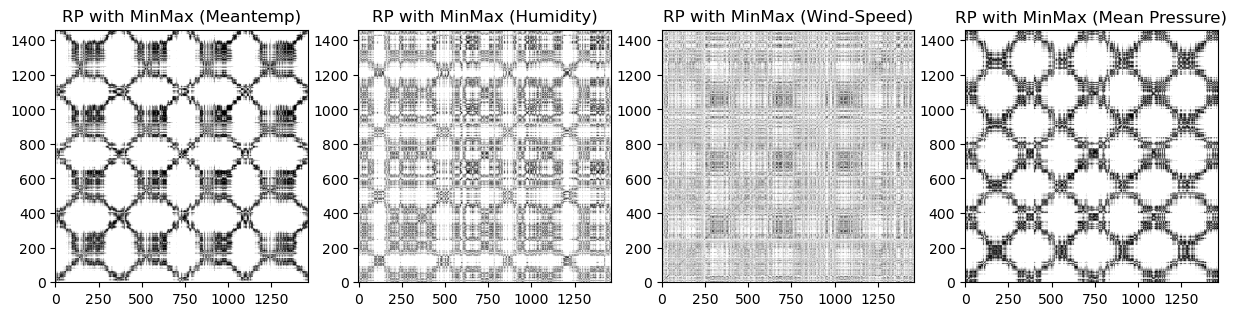

In [55]:
# 'meantemp' recurrence plot

close_temp_mm = df_mm['meantemp'].values
close_humid_mm = df_mm['humidity'].values
close_wind_mm = df_mm['wind_speed'].values
close_press_mm = df_mm['meanpressure'].values

transformer_tem_mm = RecurrencePlot(threshold='point', percentage=20)
rp_temp_mm = transformer_tem_mm.fit_transform(close_temp_mm.reshape(1, -1))

transformer_hum_mm = RecurrencePlot(threshold='point', percentage=20)
rp_humid_mm = transformer_hum_mm.fit_transform(close_humid_mm.reshape(1, -1))

transformer_win_mm = RecurrencePlot(threshold='point', percentage=20)
rp_wind_mm = transformer_win_mm.fit_transform(close_wind_mm.reshape(1, -1))

transformer_pre_mm = RecurrencePlot(threshold='point', percentage=20)
rp_press_mm = transformer_pre_mm.fit_transform(close_press_mm.reshape(1, -1))

# 이미지 출력
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(rp_temp_mm[0], cmap='binary', origin='lower')
axes[0].set_title('RP with MinMax (Meantemp)')

axes[1].imshow(rp_humid_mm[0], cmap='binary', origin='lower')
axes[1].set_title('RP with MinMax (Humidity)')

axes[2].imshow(rp_wind_mm[0], cmap='binary', origin='lower')
axes[2].set_title('RP with MinMax (Wind-Speed)')

axes[3].imshow(rp_press_mm[0], cmap='binary', origin='lower')
axes[3].set_title('RP with MinMax (Mean Pressure)')

In [56]:
# rp1과 rp2를 element-wise로 서로 다른 픽셀의 개수를 세기 위해 1로 다른 픽셀을 표시합니다.
different_pixels_temp_mm = np.sum(rp_temp != rp_temp_mm)

# 서로 다른 픽셀의 비율
difference_ratio_temp_mm = (different_pixels_temp_mm / (1462*1462)) * 100

print("< meantemp 변수에 대한 rp 비교 >")
print(f"""rp_temp과 rp_temp_mm 다른 픽셀 비율: {difference_ratio_temp_mm:.5f}%

rp_temp : 스케일링 적용 전 원본
re_temp_mm : Min-Max Scaling 적용 후""")

< meantemp 변수에 대한 rp 비교 >
rp_temp과 rp_temp_mm 다른 픽셀 비율: 0.00000%

rp_temp : 스케일링 적용 전 원본
re_temp_mm : Min-Max Scaling 적용 후


In [57]:
different_pixels_temp_mm

0

In [58]:
# rp1과 rp2를 element-wise로 서로 다른 픽셀의 개수를 세기 위해 1로 다른 픽셀을 표시합니다.
different_pixels_humid_mm = np.sum(rp_humid != rp_humid_mm)

# 서로 다른 픽셀의 비율
difference_ratio_humid_mm = (different_pixels_humid_mm / (1462*1462)) * 100

print("< humidity 변수에 대한 rp 비교 >")
print(f"""rp_humid과 rp_humid_mm 다른 픽셀 비율: {difference_ratio_humid_mm:.5f}%

rp_humid : 스케일링 적용 전 원본
re_humid_mm : Min-Max Scaling 적용 후""")

< humidity 변수에 대한 rp 비교 >
rp_humid과 rp_humid_mm 다른 픽셀 비율: 0.00187%

rp_humid : 스케일링 적용 전 원본
re_humid_mm : Min-Max Scaling 적용 후


In [59]:
different_pixels_humid_mm

40

In [60]:
# rp1과 rp2를 element-wise로 서로 다른 픽셀의 개수를 세기 위해 1로 다른 픽셀을 표시합니다.
different_pixels_wind_mm = np.sum(rp_wind != rp_wind_mm)

# 서로 다른 픽셀의 비율
difference_ratio_wind_mm = (different_pixels_wind_mm / (1462*1462)) * 100

print("< wind_speed 변수에 대한 rp 비교 >")
print(f"""rp_wind와 rp_wind_mm 다른 픽셀 비율: {difference_ratio_wind_mm:.5f}%

rp_wind : 스케일링 적용 전 원본
re_wind_mm : Min-Max Scaling 적용 후""")

< wind_speed 변수에 대한 rp 비교 >
rp_wind와 rp_wind_mm 다른 픽셀 비율: 0.00037%

rp_wind : 스케일링 적용 전 원본
re_wind_mm : Min-Max Scaling 적용 후


In [61]:
different_pixels_wind_mm

8

In [62]:
# rp1과 rp2를 element-wise로 서로 다른 픽셀의 개수를 세기 위해 1로 다른 픽셀을 표시합니다.
different_pixels_press_mm = np.sum(rp_press != rp_press_mm)

# 서로 다른 픽셀의 비율
difference_ratio_press_mm = (different_pixels_press_mm / (1462*1462)) * 100

print("< meanpressure 변수에 대한 rp 비교 >")
print(f"""rp_press와 rp_press_mm 다른 픽셀 비율: {difference_ratio_press_mm:.5f}%

rp_press : 스케일링 적용 전 원본
re_press_mm : Min-Max Scaling 적용 후""")

< meanpressure 변수에 대한 rp 비교 >
rp_press와 rp_press_mm 다른 픽셀 비율: 0.09844%

rp_press : 스케일링 적용 전 원본
re_press_mm : Min-Max Scaling 적용 후


In [63]:
different_pixels_press_mm

2104

### < Min-Max Scaler 적용 전 후 바뀐 픽셀 개수 >
### 'meantemp'  --> 0개
### 'humidity'  --> 40개
### 'wind_speed'  --> 8개
### 'meanpressure'  --> 2104개

## (2) Standard Scaling

In [64]:
# MinMaxScaler 객체 생성
scaler_s = StandardScaler()

# 선택한 컬럼들에 대해 Min-Max 스케일링 수행
scaled_values_s = scaler_s.fit_transform(df[['meantemp','humidity', 'wind_speed', 'meanpressure']])
df_s = df.copy()  # 기존의 df를 복사하여 df_scaled 생성
df_s[['meantemp','humidity', 'wind_speed', 'meanpressure']] = scaled_values_s

# 스케일링된 데이터 확인
df_s

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,-2.109500,1.415439,-1.491699,0.025321
2013-01-02,-2.463454,1.862828,-0.838196,0.037162
2013-01-03,-2.495219,1.564569,-0.475626,0.041972
2013-01-04,-2.291015,0.630022,-1.221233,0.033647
2013-01-05,-2.654044,1.554627,-0.680303,0.029946
...,...,...,...,...
2016-12-28,-1.126952,0.433776,-0.713674,0.024758
2016-12-29,-1.396406,1.615699,-0.175921,0.032193
2016-12-30,-1.551990,1.723641,-0.117442,0.037743


Text(0.5, 1.0, 'RP with Standard (Mean Pressure)')

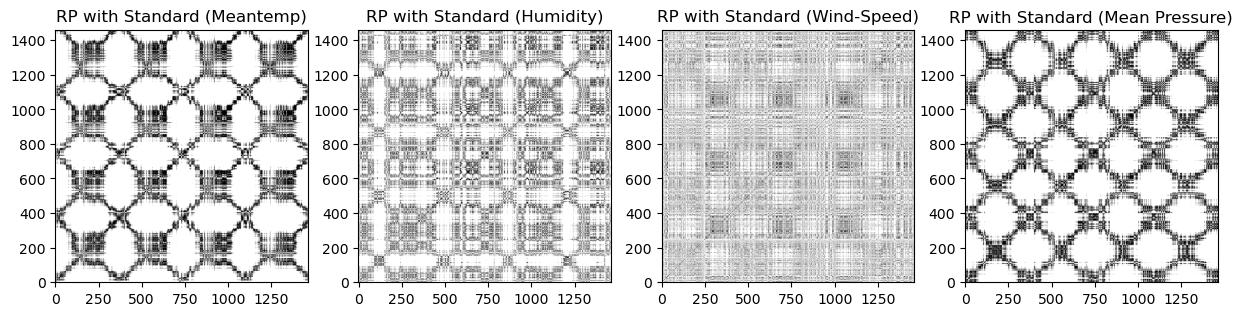

In [66]:
# 'meantemp' recurrence plot

close_temp_s = df_s['meantemp'].values
close_humid_s = df_s['humidity'].values
close_wind_s = df_s['wind_speed'].values
close_press_s = df_s['meanpressure'].values

transformer_tem_s = RecurrencePlot(threshold='point', percentage=20)
rp_temp_s = transformer_tem_s.fit_transform(close_temp_s.reshape(1, -1))

transformer_hum_s = RecurrencePlot(threshold='point', percentage=20)
rp_humid_s = transformer_hum_s.fit_transform(close_humid_s.reshape(1, -1))

transformer_win_s = RecurrencePlot(threshold='point', percentage=20)
rp_wind_s = transformer_win_s.fit_transform(close_wind_s.reshape(1, -1))

transformer_pre_s = RecurrencePlot(threshold='point', percentage=20)
rp_press_s = transformer_pre_s.fit_transform(close_press_s.reshape(1, -1))

# 이미지 출력
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(rp_temp_s[0], cmap='binary', origin='lower')
axes[0].set_title('RP with Standard (Meantemp)')

axes[1].imshow(rp_humid_s[0], cmap='binary', origin='lower')
axes[1].set_title('RP with Standard (Humidity)')

axes[2].imshow(rp_wind_s[0], cmap='binary', origin='lower')
axes[2].set_title('RP with Standard (Wind-Speed)')

axes[3].imshow(rp_press_s[0], cmap='binary', origin='lower')
axes[3].set_title('RP with Standard (Mean Pressure)')

In [67]:
# rp1과 rp2를 element-wise로 서로 다른 픽셀의 개수를 세기 위해 1로 다른 픽셀을 표시합니다.
different_pixels_temp_s = np.sum(rp_temp != rp_temp_s)

# 서로 다른 픽셀의 비율
difference_ratio_temp_s = (different_pixels_temp_s / (1462*1462)) * 100

print("< meantemp 변수에 대한 rp 비교 >")
print(f"""rp_temp과 rp_temp_s 다른 픽셀 비율: {difference_ratio_temp_s:.5f}%

rp_temp : 스케일링 적용 전 원본
re_temp_s : Standard Scaling 적용 후""")

< meantemp 변수에 대한 rp 비교 >
rp_temp과 rp_temp_s 다른 픽셀 비율: 0.00000%

rp_temp : 스케일링 적용 전 원본
re_temp_s : Standard Scaling 적용 후


In [68]:
different_pixels_temp_s

0

In [73]:
# rp1과 rp2를 element-wise로 서로 다른 픽셀의 개수를 세기 위해 1로 다른 픽셀을 표시합니다.
different_pixels_humid_s = np.sum(rp_humid != rp_humid_s)

# 서로 다른 픽셀의 비율
difference_ratio_humid_s = (different_pixels_humid_s / (1462*1462)) * 100

print("< humidity 변수에 대한 rp 비교 >")
print(f"""rp_humid과 rp_humid_s 다른 픽셀 비율: {difference_ratio_humid_s:.5f}%

rp_humid : 스케일링 적용 전 원본
re_humid_s : Standard Scaling 적용 후""")

< humidity 변수에 대한 rp 비교 >
rp_humid과 rp_humid_s 다른 픽셀 비율: 0.00009%

rp_humid : 스케일링 적용 전 원본
re_humid_s : Standard Scaling 적용 후


In [72]:
different_pixels_humid_s

2

In [75]:
# rp1과 rp2를 element-wise로 서로 다른 픽셀의 개수를 세기 위해 1로 다른 픽셀을 표시합니다.
different_pixels_wind_s = np.sum(rp_wind != rp_wind_s)

# 서로 다른 픽셀의 비율
difference_ratio_wind_s = (different_pixels_wind_s / (1462*1462)) * 100

print("< wind_speed 변수에 대한 rp 비교 >")
print(f"""rp_wind와 rp_wind_s 다른 픽셀 비율: {difference_ratio_wind_s:.5f}%

rp_wind : 스케일링 적용 전 원본
re_wind_s : Standard Scaling 적용 후""")

< wind_speed 변수에 대한 rp 비교 >
rp_wind와 rp_wind_s 다른 픽셀 비율: 0.00028%

rp_wind : 스케일링 적용 전 원본
re_wind_s : Standard Scaling 적용 후


In [76]:
different_pixels_wind_s

6

In [77]:
# rp1과 rp2를 element-wise로 서로 다른 픽셀의 개수를 세기 위해 1로 다른 픽셀을 표시합니다.
different_pixels_press_s = np.sum(rp_press != rp_press_s)

# 서로 다른 픽셀의 비율
difference_ratio_press_s = (different_pixels_press_s / (1462*1462)) * 100

print("< meanpressure 변수에 대한 rp 비교 >")
print(f"""rp_press와 rp_press_s 다른 픽셀 비율: {difference_ratio_press_s:.5f}%

rp_press : 스케일링 적용 전 원본
re_press_s : Stnadard Scaling 적용 후""")

< meanpressure 변수에 대한 rp 비교 >
rp_press와 rp_press_s 다른 픽셀 비율: 0.28529%

rp_press : 스케일링 적용 전 원본
re_press_s : Stnadard Scaling 적용 후


In [78]:
different_pixels_press_s

6098

### < Min-Max Scaler 적용 전 후 바뀐 픽셀 개수 >
### 'meantemp'  --> 0개
### 'humidity'  --> 2개
### 'wind_speed'  --> 6개
### 'meanpressure'  --> 6098개 (*얘가 좀 많이 바뀌었는데...? 그래봤자 0.3% 정도...)